## Project Statement:
* AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities. 

* The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. 
* The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:
    1) *Determine the states that are generating the highest revenues* 
    2) *Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same.*
    
Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year. 



#### Importing required Libraries 

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#### saving the data set into variable df
##### reading the data

In [27]:
df = pd.read_excel("sales_analysis_data.xlsx")
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


##### this df.head() function gives general idea about different features and what the dataset includes

##### Preprocessing and cleaning the data

In [28]:
#Duplicate dataset
df1 = df.copy()

In [29]:
# Number of rows
print("Total enrties:\n",df1.shape[0])

# Column names or features
print("Feature names:\n",df1.columns.tolist())

Total enrties:
 7560
Feature names:
 ['Date', 'Time', 'State', 'Group', 'Unit', 'Sales']


In [30]:
#check for missing values
print("Missing Values:\n",df1.isnull().sum())

Missing Values:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [31]:
#checking for duplicates
print("Duplicates:\n",df1.duplicated().sum())
##or df1.drop_duplicates()

Duplicates:
 0


In [32]:
#cheking for datatypes
print("Data types:\n", df1.dtypes)

Data types:
 Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object


In [33]:
#removing white space from the column name 
df1['Group'] = df1['Group'].str.strip()
df['State'] = df['State'].str.strip()
df['Group'] = df['Group'].str.strip()

#making it for all remaining columns
df1.columns = df1.columns.str.strip()

In [34]:
#print cleaned dataset
print("Cleaned dataset \n:", df1.head())

Cleaned dataset 
:         Date        Time State    Group  Unit  Sales
0 2020-10-01     Morning    WA     Kids     8  20000
1 2020-10-01     Morning    WA      Men     8  20000
2 2020-10-01     Morning    WA    Women     4  10000
3 2020-10-01     Morning    WA  Seniors    15  37500
4 2020-10-01   Afternoon    WA     Kids     3   7500


##### Exploratory Data Analysis (EDA)

### Data Wrangling

In [35]:
#print statistical summary
print("Statistical summary:\n")
df1.describe()

Statistical summary:



,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


##### Inference on statistical summary
1. On an average 18 number of units are sold, minimum of 2 and maximum of 65. 
2. Units sold has standard deviation of 12.90 indicating the dispersion of data around the mean 18.
3. 25% of dataset have 8 or less unit sold, 50% dataset have 14 or less unit sold and 75% of dataset have 26 or less unit sold.
4. On an average 45013.56 sales earning is done.
5. 25% of dataset have 20,000 sales or less, 50% of dataset have 35,000 sales or less and 75% of dataset have 65,000 or less sales.
6. The maximum sales are 1,62,500 but 75% of dataset falls within 65,000 or less. which indicates the sales may have outliers present, particularly towards the higher end of the distribution. 
7. The IQR (inter quartile range) for sales can give more details about dataset distribution.

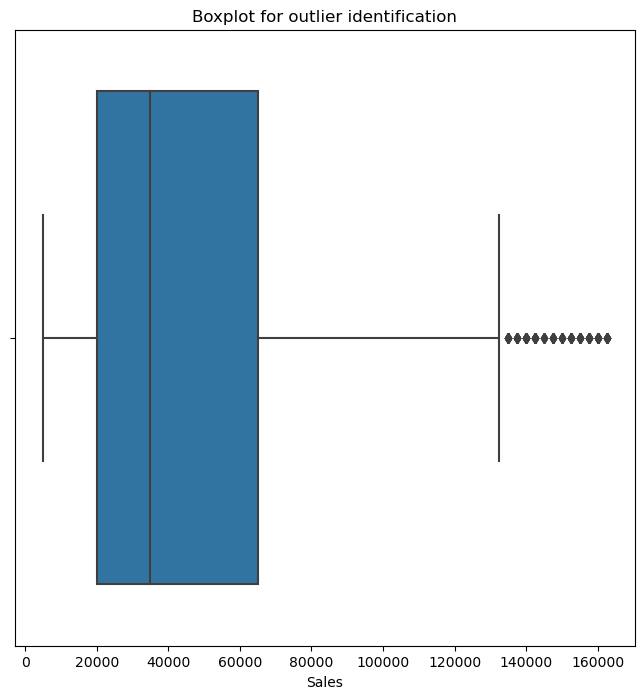

In [36]:
#dealing withoutliers
#lets see outliers if present thorugh box plot
plt.figure(figsize = (8,8))
sns.boxplot(x='Sales', data=df1)
plt.title("Boxplot for outlier identification")
plt.show()

> The boxplot shows outliers in the Sales at higher Sales value. Which should be considered before further analysis.

In [37]:
#calculating the IQR (inter quartile range)
q1 = df1['Sales'].quantile(0.25)
print("25% sale:", q1)
q3 = df1['Sales'].quantile(0.75)
print("75% sale:", q3)
IQR = q3 - q1
print("Inter quartile range:", IQR)

#defining upper and lower bound for outliers
#lower bound
lb = q1 - 1.5 *IQR
print("Lower bound:", lb)
#upper bound
ub = q3 + 1.5 *IQR
print("Upper bound:", ub)

#identifying outliers
o = df1[(df1['Sales']< lb) | (df1['Sales']> ub)]
print("Outliers \n")
print(o)


25% sale: 20000.0
75% sale: 65000.0
Inter quartile range: 45000.0
Lower bound: -47500.0
Upper bound: 132500.0
Outliers 

           Date        Time State    Group  Unit   Sales
5082 2020-12-01   Afternoon   VIC    Women    63  157500
5083 2020-12-01   Afternoon   VIC  Seniors    62  155000
5161 2020-12-02     Morning   VIC      Men    56  140000
5162 2020-12-02     Morning   VIC    Women    59  147500
5169 2020-12-02     Evening   VIC      Men    64  160000
...         ...         ...   ...      ...   ...     ...
7432 2020-12-29   Afternoon   VIC     Kids    65  162500
7433 2020-12-29   Afternoon   VIC      Men    54  135000
7437 2020-12-29     Evening   VIC      Men    54  135000
7515 2020-12-30     Morning   VIC  Seniors    65  162500
7519 2020-12-30   Afternoon   VIC  Seniors    62  155000

[123 rows x 6 columns]


In [38]:
#removeing outliers
df1 =df1[(df1['Sales'] >= lb) & (df1['Sales']<= ub)]

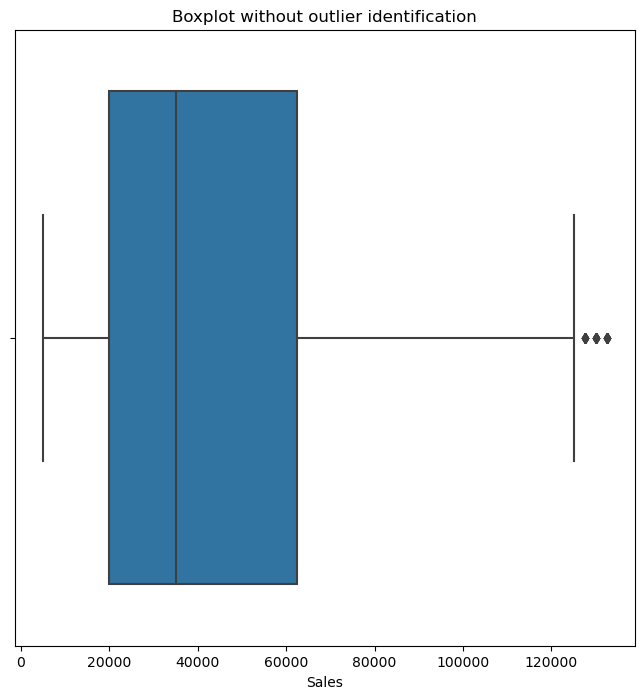

In [39]:
#visualizing thorugh box plot 
plt.figure(figsize = (8,8))
sns.boxplot(x='Sales', data=df1)
plt.title("Boxplot without outlier identification")
plt.show()

#### Data Normalization

In [40]:
scaler = StandardScaler()

In [42]:
sales_reshaped = df1['Sales'].values.reshape(-1,1)
df1['Sales'] = scaler.fit_transform(sales_reshaped)

In [43]:
print(df1.head())

        Date        Time State    Group  Unit     Sales
0 2020-10-01     Morning    WA     Kids     8 -0.787892
1 2020-10-01     Morning    WA      Men     8 -0.787892
2 2020-10-01     Morning    WA    Women     4 -1.126149
3 2020-10-01     Morning    WA  Seniors    15 -0.195941
4 2020-10-01   Afternoon    WA     Kids     3 -1.210714


In [44]:
# Group by 'State' and calculate total revenue
revenue_by_state = df1.groupby('State')['Sales'].sum().reset_index()

In [45]:
# Determine the states generating the highest revenues
highest_revenue_states = revenue_by_state.nlargest(5, 'Sales')
print("States generating the highest revenues:")
print(highest_revenue_states)

States generating the highest revenues:
  State        Sales
5   VIC  1549.183485
0   NSW   954.357595
3    SA   409.340035
2   QLD  -451.187303
4   TAS  -811.685342


In [46]:
# Formulate sales programs for states with lower revenues
lower_revenue_states = revenue_by_state.nsmallest(5, 'Sales')
print("States with lower revenues:")
print(lower_revenue_states)

States with lower revenues:
  State       Sales
6    WA -832.234491
1    NT -817.773979
4   TAS -811.685342
2   QLD -451.187303
3    SA  409.340035


#### Feature engineering


In [47]:
#extracting month, day, year from Date column
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year
df1['Day'] = df1['Date'].dt.day

In [48]:
#creating new feature for total sales per group
total_sales_bygroup = df1.groupby('Group')['Sales'].sum().reset_index()
total_sales_bygroup.columns = ['Group', 'Total_Sales']
df1 = pd.merge(df1, total_sales_bygroup, on = 'Group', how = 'left')

In [49]:
#Creating a new feature for total sales per state
total_sales_per_state = df1.groupby('State')['Sales'].sum().reset_index()
total_sales_per_state.columns = ['State', 'Total_Sales_State']
df1 = pd.merge(df1, total_sales_per_state, on='State', how='left')

In [50]:
#Creating a new feature for average sales per unit
df1['Average_Sales_Per_Unit'] = df1['Sales'] / df1['Unit']

In [51]:
#Creating a new feature for total sales per day
total_sales_per_day = df1.groupby('Date')['Sales'].sum().reset_index()
total_sales_per_day.columns = ['Date', 'Total_Sales_Day']
df1 = pd.merge(df1, total_sales_per_day, on='Date', how='left')

In [52]:
#Creating a new feature for total sales per month
total_sales_per_month = df1.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
total_sales_per_month.columns = ['Year', 'Month', 'Total_Sales_Month']
df1 = pd.merge(df1, total_sales_per_month, on=['Year', 'Month'], how='left')

In [53]:
#Creating a new feature for total sales per group and state combination
total_sales_per_group_state = df1.groupby(['Group', 'State'])['Sales'].sum().reset_index()
total_sales_per_group_state.columns = ['Group', 'State', 'Total_Sales_Group_State']
df1 = pd.merge(df1, total_sales_per_group_state, on=['Group', 'State'], how='left')

In [62]:
#Creating total sales per week
df1['Week'] = df1['Date'].dt.week
total_sales_per_week = df1.groupby('Week')['Sales'].sum().reset_index()

C:\Users\vaish\AppData\Local\Temp\ipykernel_11664\1198167427.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [63]:
#updated dataframe
df1.head()

,Date,Time,State,Group,Unit,Sales,Month,Year,Day,Total_Sales,Total_Sales_State,Average_Sales_Per_Unit,Total_Sales_Day,Total_Sales_Month,Total_Sales_Group_State,Week
0,2020-10-01,Morning,WA,Kids,8,-0.787892,10,2020,1,21.198341,-832.234491,-0.098486,2.821633,175.640294,-205.120010,40
1,2020-10-01,Morning,WA,Men,8,-0.787892,10,2020,1,26.744524,-832.234491,-0.098486,2.821633,175.640294,-200.807225,40
2,2020-10-01,Morning,WA,Women,4,-1.126149,10,2020,1,6.756385,-832.234491,-0.281537,2.821633,175.640294,-217.381848,40
3,2020-10-01,Morning,WA,Seniors,15,-0.195941,10,2020,1,-54.699249,-832.234491,-0.013063,2.821633,175.640294,-208.925408,40
4,2020-10-01,Afternoon,WA,Kids,3,-1.210714,10,2020,1,21.198341,-832.234491,-0.403571,2.821633,175.640294,-205.120010,40


#### Data Visualization

#### 1. Sales distribution by Group

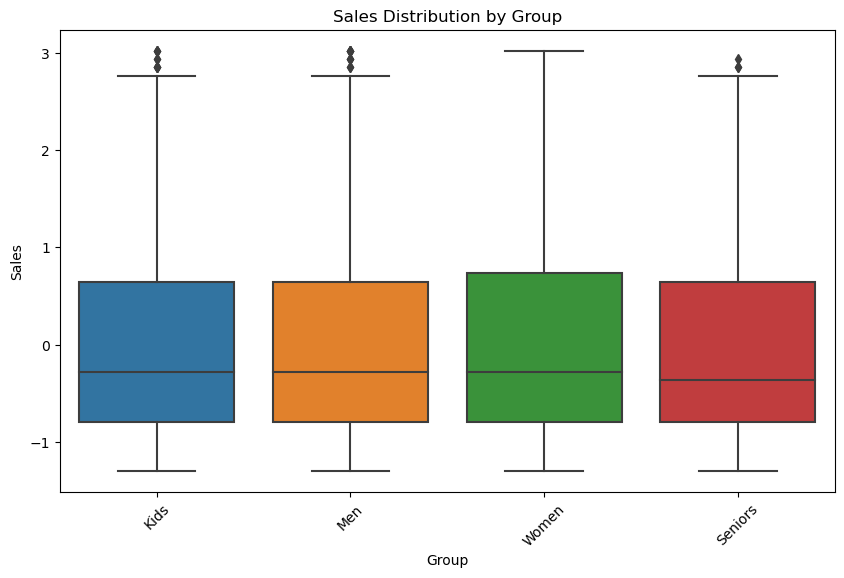

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Sales', data=df1)
plt.title('Sales Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

##### 2. Sales trends byState

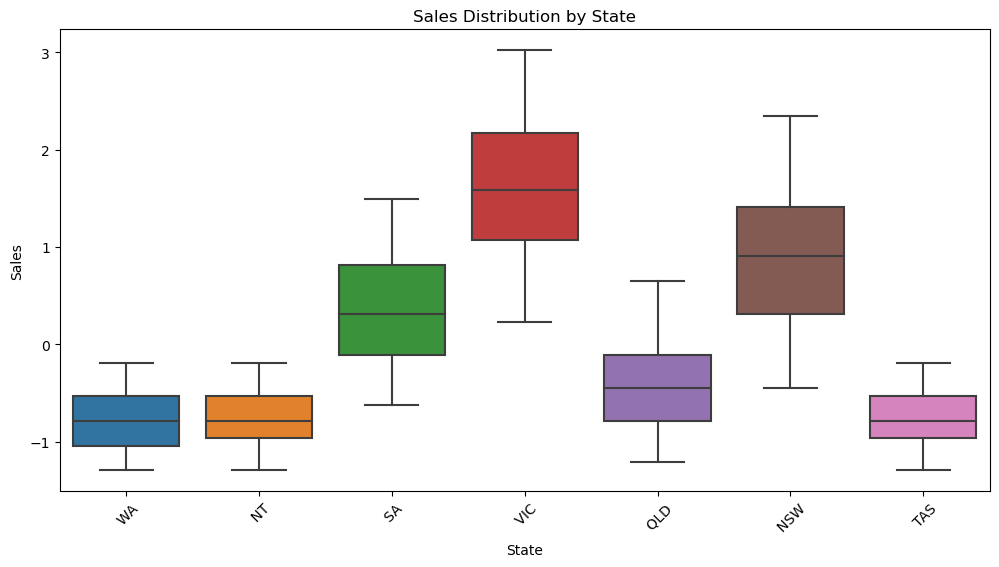

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Sales', data=df1)
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

##### 3. Total Sales over time

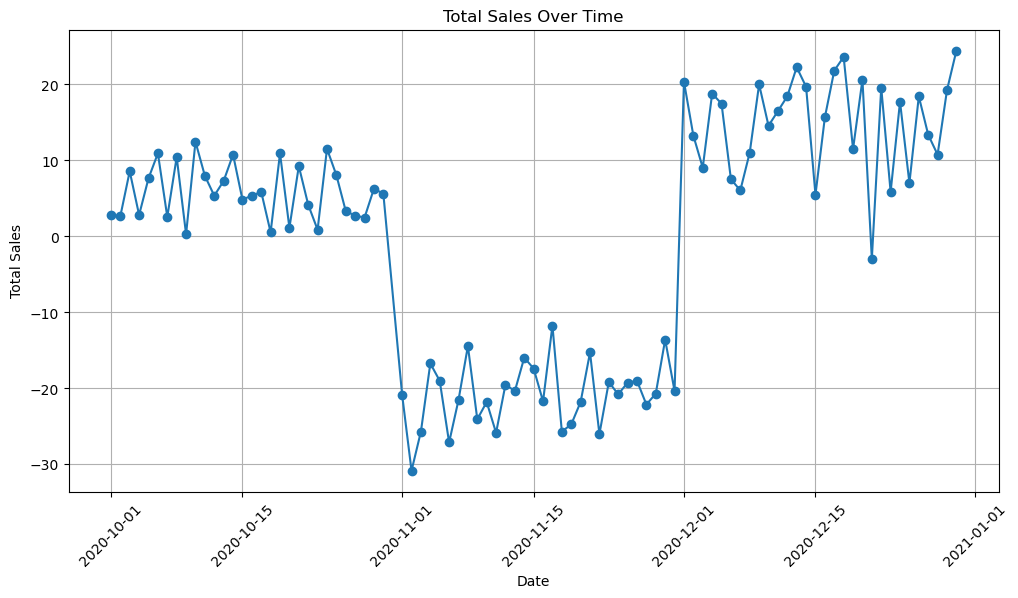

In [57]:
total_sales_time = df1.groupby('Date')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(total_sales_time['Date'], total_sales_time['Sales'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 4. Average Sales per Unit by Group

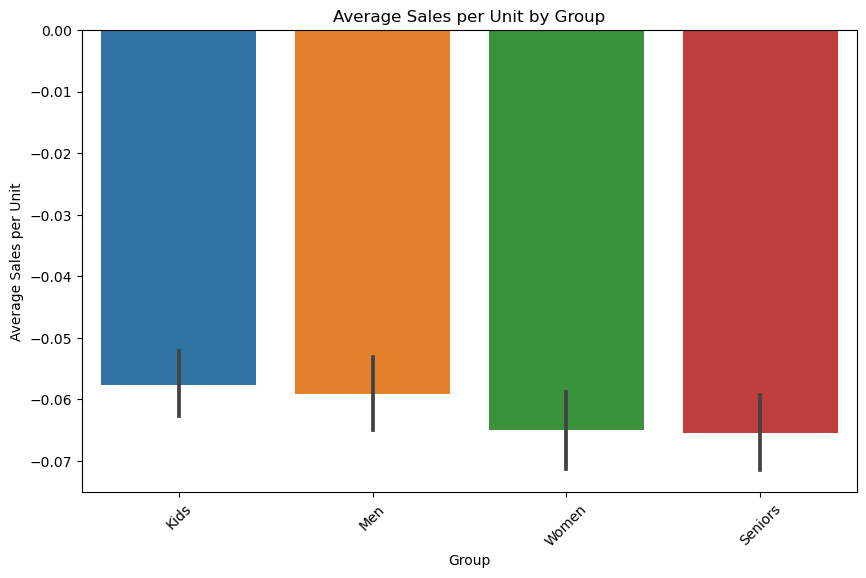

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Average_Sales_Per_Unit', data=df1)
plt.title('Average Sales per Unit by Group')
plt.xlabel('Group')
plt.ylabel('Average Sales per Unit')
plt.xticks(rotation=45)
plt.show()

#### 5. Total sales per month

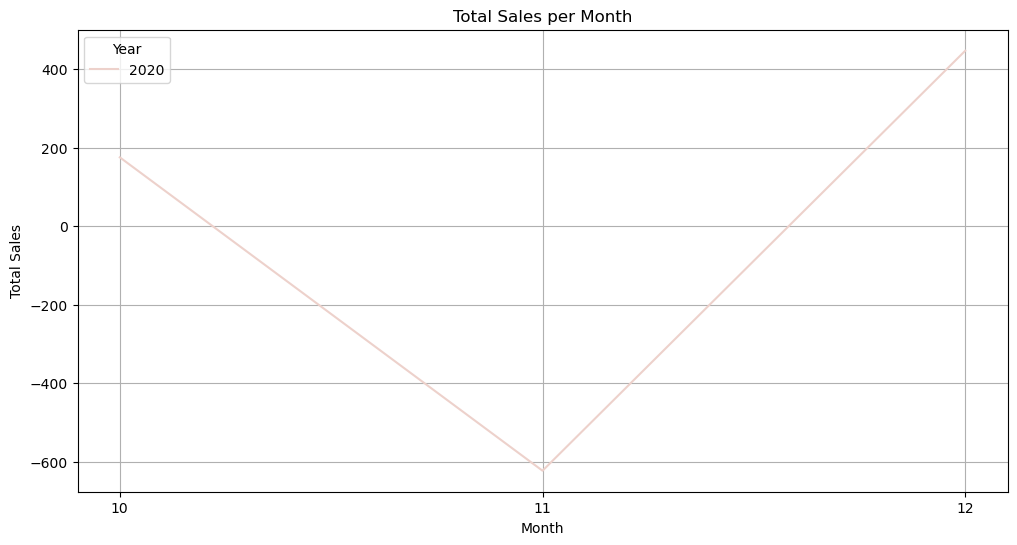

In [60]:
total_sales_month = df1.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=total_sales_month)
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.xticks(range(10, 13))
plt.grid(True)
plt.show()

#### 6.Total Sales per week

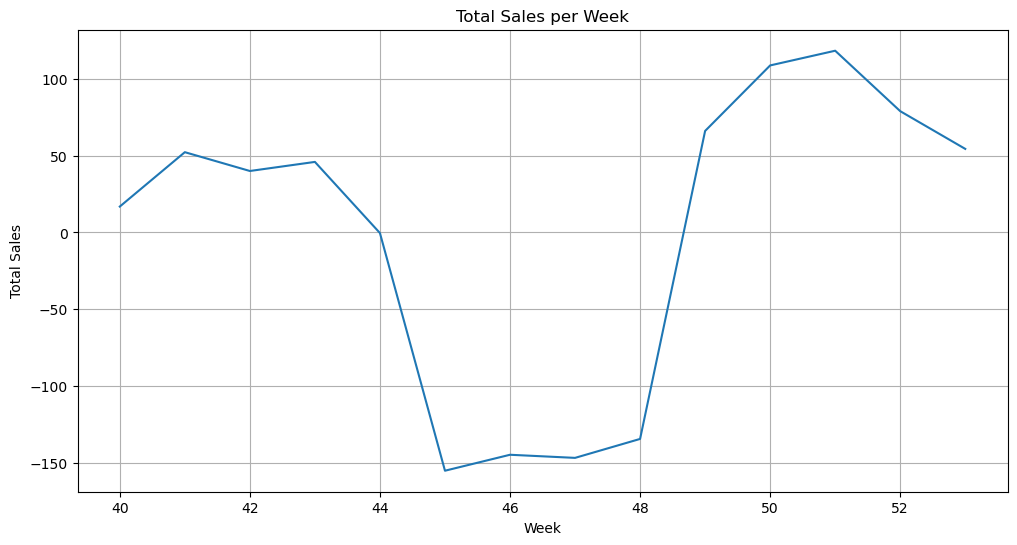

In [64]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week', y='Sales', data=total_sales_per_week)
plt.title('Total Sales per Week')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [66]:
!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Sales Analysis Dashboard"),
    
    # Dropdown for selecting sales group
    dcc.Dropdown(
        id='group-dropdown',
        options=[{'label': group, 'value': group} for group in df1['Group'].unique()],
        value=df1['Group'].value_counts().idxmax(),  # Set default to the most sold group
        clearable=False,
        style={'width': '50%'}
    ),
    
    # Dropdown for selecting state
    dcc.Dropdown(
        id='state-dropdown',
        options=[{'label': state, 'value': state} for state in df1['State'].unique()],
        value=df1['State'].value_counts().idxmax(),  # Set default to the highest revenue state
        clearable=False,
        style={'width': '50%'}
    ),
    
    # Graph for sales trends by month
    dcc.Graph(id='sales-by-month-plot'),
    
    # Bar chart for total sales by state and group
    html.Div([
        dcc.Graph(id='total-sales-by-state-group')
    ])
])

# Define callback to update the plot based on dropdown selection
@app.callback(
    [Output('sales-by-month-plot', 'figure'),
     Output('total-sales-by-state-group', 'figure')],
    [Input('group-dropdown', 'value'),
     Input('state-dropdown', 'value')]
)
def update_plot(selected_group, selected_state):
    # Filter data based on dropdown selection
    filtered_df = df1[(df1['Group'] == selected_group) & (df1['State'] == selected_state)]
    
    # Sales trends by month
    sales_by_month = filtered_df.groupby('Month')['Sales'].sum().reset_index()
    fig_sales_by_month = px.line(sales_by_month, x='Month', y='Sales', title=f'Sales Trends for {selected_group} in {selected_state}')
    
    # Total sales by state and group
    total_sales_state_group = filtered_df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
    fig_total_sales_state_group = px.bar(total_sales_state_group, x='State', y='Sales', color='Group', title='Total Sales by State and Group')
    
    return fig_sales_by_month, fig_total_sales_state_group

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


### Conclusions

#### > States Generating Highest Revenues: 
    * During the forth quarter the states Victoria(VIC), New South Wales (NSW), and South Australia (SA). These states should be focused on for further investment and expansion due to their strong revenue generation.

#### > States Generating Lower Revenues (Concern for Sales Program):
    * Weastern Australia (WA), Northern Territory (NT), and Tasmania (TAS) are generating lower revenues compared to others. The few programs, targeted sales programs can improve their sales performance.
    
#### > Sales distribution by Group
    * It is evident that certain groups contribute more to overall sales which can be seen in dashboard.
    
#### > Sales trends Over time
    * Visualizing sales trends over time, such as by month and week, provides insights into seasonal patterns and helps in forecasting future sales. This information can guide inventory management and marketing campaigns to align with periods of high sales activity.
    
#### > Data Visualization Dashboard
    *The Sales Analysis Dashboard created using Dash provides a user-friendly interface for exploring sales data interactively. It allows stakeholders to dynamically select different sales groups and states to visualize sales trends, facilitating data-driven decision-making.

###                                                                - Project by Vaishnavi Patel 